In [14]:
import pandas as pd
import os
import pygeostat as gs
import numpy as np
import matplotlib.pyplot as plt
from DisplayPostscriptInJupyter import *
from scipy.stats import norm

In [15]:
# Define the name for the main folder
name_run = 'acc_test'

# Create the working folders if they do not exists
os.makedirs('./'+ name_run +'/data/', exist_ok=True)
os.makedirs('./'+ name_run +'/outputs/', exist_ok=True)
os.makedirs('./'+ name_run +'/figures/', exist_ok=True)

In [16]:
# Set the working folders

datdir = './'+ name_run +'/data/'
outdir = './'+ name_run +'/outputs/'
figdir = './'+ name_run +'/figures/'
img = './image_conv/'
exedir = './exes/'

# Accuracy plot

## p-value

First step is to calculate the p-values of true regarding the model of unceranty 

$ F^*(u_i;z(u_i)|n(u_i)), i = 1,...,n  $

In [17]:
# Load the file with samples

df_sample_100 = gs.DataFile(datdir + 'df_sample_100.dat')

# Calculate the p Value using the local model of uncertanty

df_sample_100['p_value'] = norm.cdf(df_sample_100['NS_true'], df_sample_100['E-type'], df_sample_100['variance']**0.5)


In [18]:
df_sample_100.data

,NS_true,E-type,variance,p_value
0,0.197454,-0.07617,0.728497,0.625737
1,-0.266001,-0.27795,0.885420,0.505066
2,-1.774623,-0.59076,0.912924,0.107666
3,1.305720,-0.19407,0.901706,0.942880
4,0.304516,0.14166,1.055293,0.562981
5,-0.128743,-0.37010,0.796299,0.606601
6,0.231685,-0.34157,0.984756,0.718258
7,0.240198,0.08887,1.111887,0.557057
8,0.420896,-0.55340,0.998712,0.835201
9,0.627527,-0.53700,1.039919,0.873264


## p-probability interval calculation

Symmetric intervals for calculation

$\text{cdf}_\text{lo} = \frac{(1-p)}{2}$ and $\text{cdf}_\text{hi} = \frac{(1+p)}{2}$

p = pval

Test to define if True is inside the inverval

$\epsilon(u_i;p) = \begin{cases}
1, & \text{if } F(u_i;z(u_i)|n(u_i)) \in (p_{\text{low}}, p_{\text{upp}}) \\
0, & \text{otherwise}
\end{cases} $

In [19]:
# Variables used in calculation 

true = np.array(df_sample_100['p_value']) # p-values of true
pinc = 0.1 # probability increments 
npint = int(0.999 / pinc) # number for intervals
nd = len(true) # number of data


In [20]:
# Loop over all probability increments

vr1 = np.zeros(npint)
vr2 = np.zeros(npint)

for ival in range(npint):
    
    pval = 0.0
    pval += (ival + 1) * pinc  # Alterando os intervalos a cada iteração
    vr1[ival] = pval
    cdflo = (1.0 - pval) / 2.0
    cdfhi = 1.0 - cdflo

    num = 0 # Count when True is in interval
    
    for id in range(nd):
        cdf = true[id]
        if cdf > cdflo and cdf < cdfhi:
            num += 1
    act = float(num) / float(nd)
    vr2[ival] = act

    
    print(f'Interval {pval:.3f} actual fraction {act:.3f}')

Interval 0.100 actual fraction 0.100
Interval 0.200 actual fraction 0.300
Interval 0.300 actual fraction 0.500
Interval 0.400 actual fraction 0.500
Interval 0.500 actual fraction 0.600
Interval 0.600 actual fraction 0.600
Interval 0.700 actual fraction 0.700
Interval 0.800 actual fraction 0.900
Interval 0.900 actual fraction 1.000


## Accuracy plot

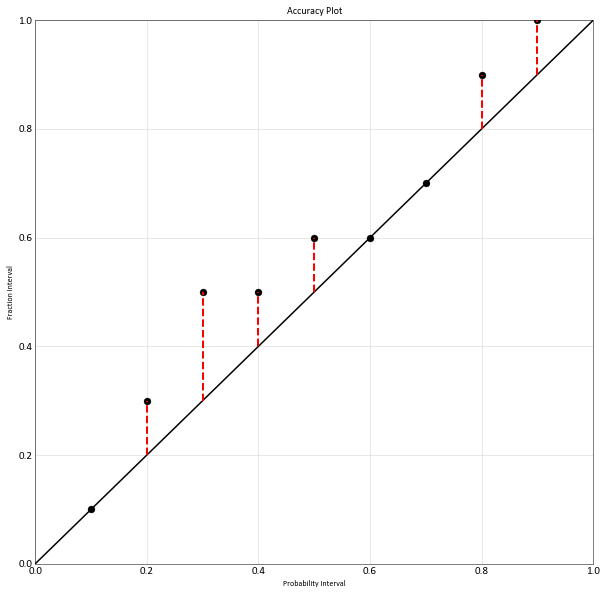

In [21]:
# Create an array for the 45-degree line (y = x)
line = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 10))
plt.scatter(vr1, vr2, c='black')  # Plot the points
plt.plot(line, line, 'k-')  # Plot the 45-degree line

for x, y in zip(vr1, vr2):
    plt.plot([x, x], [x, y], 'r--', linewidth=2)

plt.xlabel("Probability Interval")
plt.ylabel("Fraction Interval")
plt.xlim(0, 1)  # x-axis limits
plt.ylim(0, 1)  # y-axis limits
plt.grid(True)
plt.title("Accuracy Plot")
plt.show()

Based on: C. V. Deutsch, 2010, Display of Cross Validation / Jackknife Results, CCG Paper 2010-406, Centre for Computational Geostatistics, University of Alberta, Edmonton, Canada